In [26]:
import scipy.stats as ss
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [27]:
## black scholes formula
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
 
def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
 
def BlackScholes(type, S0, K, r, sigma, T):
    if type == 'call':
        return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, sigma, T)) - S0 * ss.norm.cdf(-d1(S0, K, r, sigma, T))

In [28]:
def readToDataFrame(input):
    """ read data from input path and return dataframe where settle date and todaydate is transfferd to datetime format
    """
    optiondata = pd.read_table( input, delimiter = ",")
    todaydate_tmp = [pd.datetime.strptime(str(x), '%Y%m%d') for x in optiondata.todaydate]
    optiondata.todaydate = todaydate_tmp
    settledate_tmp = [pd.datetime.strptime(str(x), '%Y%m%d') for x in optiondata.settledate]
    optiondata.settledate = settledate_tmp
    return optiondata.drop_duplicates()
optiondata = readToDataFrame("relevantoptions2")

In [1]:
# set risk free rate as 0.01
optiondata['rfr'] = 0.01 
optiondata['bs'] = 0

NameError: name 'optiondata' is not defined

In [30]:
## sp500 1month realized index as volatility 
voldata = pd.read_table('vol2', delimiter = "\t")
voldata['Date'] = pd.to_datetime(voldata['date'])

In [31]:
voldata['todaydate'] = voldata['Date']
options = pd.merge(optiondata, voldata, on='todaydate', how='left')
myoptions = options
myoptions = options[options['vol']>0]
myoptions = myoptions.drop('date', 1)
myoptions = myoptions.drop('Date', 1)

In [32]:
def setBS(df):
    Price =  df.apply(lambda row: BlackScholes(row['optiontype'], row['today_sp_price'], row['optionstrike'], row['rfr'], row['vol'] /100 , row['daystosettle']/252), axis=1)
    df['bs'] = Price

setBS(myoptions)
myoptions = myoptions.dropna()

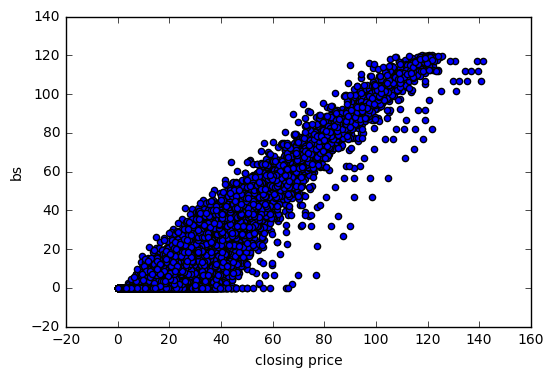

array([[ 1.        ,  0.95431971],
       [ 0.95431971,  1.        ]])

In [33]:
plt.scatter(myoptions['optionclosingprice'],myoptions['bs'] )
plt.xlabel('closing price')
plt.ylabel('bs')
plt.show()
np.corrcoef(myoptions['optionclosingprice'],myoptions['bs'])

In [34]:
myoptions['bsratio'] = (myoptions['optionclosingprice'] - myoptions['bs']) / myoptions['optionclosingprice']

In [9]:
myoptions

,todaydate,settledate,daystosettle,today_sp_price,settle_sp_price,optiontype,optionstrike,optionclosingprice,optionhighprice,optionlowprice,optionvol,optionopenint,rfr,bs,vol,bsratio
0,2013-07-09,2013-07-26,17,1652.32,1690.47,put,1580,2.825,2.90,2.75,128,6258,0.01,0.00,15.43,1.000000
1,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,4278,5233,0.01,2.32,15.43,0.871111
2,2013-07-10,2013-07-26,16,1652.62,1690.47,put,1580,2.325,2.50,2.15,107,6316,0.01,0.00,15.43,1.000000
3,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,2009,5446,0.01,2.62,15.43,0.863542
4,2013-07-11,2013-07-26,15,1675.02,1690.47,put,1580,1.050,1.20,0.90,78,6329,0.01,0.00,15.73,1.000000
5,2013-07-11,2013-07-26,15,1675.02,1690.47,put,1610,2.350,2.50,2.20,69,5993,0.01,0.00,15.73,1.000000
6,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1650,33.150,33.80,32.50,3315,6595,0.01,25.02,15.73,0.245249
7,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1660,25.750,26.20,25.30,161,14363,0.01,15.02,15.73,0.416699
8,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1690,9.400,9.70,9.10,443,13596,0.01,0.00,15.73,1.000000
9,2013-07-15,2013-07-26,11,1682.50,1690.47,put,1570,0.450,0.55,0.35,64,5404,0.01,0.00,14.64,1.000000


In [35]:
# create dictionary to store everyday's sp500 price
def createPriceDict(row, pricedict):
    if not pricedict.has_key(row['todaydate'].strftime("%B %d, %Y")):
        pricedict[row['todaydate'].strftime("%B %d, %Y")] = row['today_sp_price']

def getPrice(df):
    """get vol and sp500 today price for each day
    """
    price = {}
    df.apply(lambda row: createPriceDict(row, price), axis=1)
    return price

priceDict = getPrice(myoptions)

In [36]:
# create dictionary to store every option's volumn, open interest rate, closing price , bsprice
def createOptionDict(row, optdict):
    if not optdict.has_key((row['todaydate'],row['settledate'],row['optiontype'],row['optionstrike'])):
        optdict[(row['todaydate'],row['settledate'],row['optiontype'],row['optionstrike'])] = (row['optionvol'],
                    row['optionopenint'], row['optionclosingprice'], row['bs'])
        
def getOption(df):
    """get vol and sp500 today price for each day and save to json file
    """
    optionDic = {}
    df.apply(lambda row: createOptionDict(row, optionDic), axis=1)
    
    return optionDic

optionDic = getOption(myoptions)

In [37]:
#add sp500 yesterday's and last week's price 
def prevPrice1d(row, priceDic):
    i = 1;
    while (i < 5):
        if priceDic.has_key((row['todaydate']-datetime.timedelta(i)).strftime("%B %d, %Y")):
            return priceDic[(row['todaydate']-datetime.timedelta(i)).strftime("%B %d, %Y")]
        else:
            i+=1
    return 0

def prevPrice1week(row, priceDic):
    i = 7;
    if priceDic.has_key((row['todaydate']-datetime.timedelta(i)).strftime("%B %d, %Y")):
        return priceDic[(row['todaydate']-datetime.timedelta(i)).strftime("%B %d, %Y")]
    return 0


def addPrevPrice(df, priceDic):
    """ add s&p price of previous n days to dataframe
    """
    prvPrice =  df.apply(lambda row: prevPrice1d(row, priceDic), axis=1)
    df['sp1d'] = prvPrice
    prvweekPrice =  df.apply(lambda row: prevPrice1week(row, priceDic), axis=1)
    df['sp1w'] = prvweekPrice

addPrevPrice(myoptions,priceDict)

In [38]:
# add option's yesterday and last week's vol, openint and closing price 

def prevOption1d(row, optionDic):
    i = 1;
    while (i < 5):
        if optionDic.has_key((row['todaydate'] - datetime.timedelta(i),row['settledate'],row['optiontype'],row['optionstrike'])):
            return optionDic[((row['todaydate'] - datetime.timedelta(i)),row['settledate'],row['optiontype'],row['optionstrike'])]
        else:
            i += 1
    return -1

def prevOption1w(row, optionDic):
    i = 7;
    if optionDic.has_key((row['todaydate'] - datetime.timedelta(i),row['settledate'],row['optiontype'],row['optionstrike'])):
        return optionDic[((row['todaydate'] - datetime.timedelta(i)),row['settledate'],row['optiontype'],row['optionstrike'])]
    return -1


def addOptionDay(df, optionDic):
    # add option volume of previous n days to dataframe
    prevoptionday = df.apply(lambda row: prevOption1d(row, optionDic), axis=1)
    #print prevoptionday.head(20)
    df['volopenint%closing1d'] = prevoptionday
    prevoptionweek = df.apply(lambda row: prevOption1w(row, optionDic), axis=1)
    df['volopenint%closing1w'] = prevoptionweek
    

addOptionDay(myoptions, optionDic)

In [15]:
myoptions

,todaydate,settledate,daystosettle,today_sp_price,settle_sp_price,optiontype,optionstrike,optionclosingprice,optionhighprice,optionlowprice,optionvol,optionopenint,rfr,bs,vol,sp1d,sp1w,volopenint%closing1d,volopenint%closing1w
0,2013-07-09,2013-07-26,17,1652.32,1690.47,put,1580,2.825,2.90,2.75,128,6258,0.01,0.00,15.43,0.00,0.00,-1,-1
1,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,4278,5233,0.01,2.32,15.43,0.00,0.00,-1,-1
2,2013-07-10,2013-07-26,16,1652.62,1690.47,put,1580,2.325,2.50,2.15,107,6316,0.01,0.00,15.43,1652.32,0.00,"(128, 6258, 2.825, 0.0)",-1
3,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,2009,5446,0.01,2.62,15.43,1652.32,0.00,"(4278, 5233, 18.0, 2.32)",-1
4,2013-07-11,2013-07-26,15,1675.02,1690.47,put,1580,1.050,1.20,0.90,78,6329,0.01,0.00,15.73,1652.62,0.00,"(107, 6316, 2.325, 0.0)",-1
5,2013-07-11,2013-07-26,15,1675.02,1690.47,put,1610,2.350,2.50,2.20,69,5993,0.01,0.00,15.73,1652.62,0.00,-1,-1
6,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1650,33.150,33.80,32.50,3315,6595,0.01,25.02,15.73,1652.62,0.00,"(2009, 5446, 19.2, 2.62)",-1
7,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1660,25.750,26.20,25.30,161,14363,0.01,15.02,15.73,1652.62,0.00,-1,-1
8,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1690,9.400,9.70,9.10,443,13596,0.01,0.00,15.73,1652.62,0.00,-1,-1
9,2013-07-15,2013-07-26,11,1682.50,1690.47,put,1570,0.450,0.55,0.35,64,5404,0.01,0.00,14.64,1675.02,0.00,-1,-1


In [39]:
# select options that whose today's 500 price is within 30 of strike price 
within30data = myoptions[abs(myoptions.today_sp_price - myoptions.optionstrike)<=30]
within100data = myoptions[abs(myoptions.today_sp_price - myoptions.optionstrike)<=100]
print within100data.describe()
print within30data.describe()
haslastweek = within30data[within30data['volopenint%closing1w'] == -1]
haslastweek.describe()

       daystosettle  today_sp_price  settle_sp_price  optionstrike  \
count  48931.000000    48931.000000     48931.000000  48931.000000   
mean       8.831763     2048.921828      2056.089154   2043.230672   
std        5.163826      129.619605       130.865347    138.182215   
min        2.000000     1630.480000      1632.970000   1535.000000   
25%        4.000000     1978.350000      1978.340000   1970.000000   
50%        8.000000     2075.000000      2076.780000   2055.000000   
75%       14.000000     2117.390000      2126.060000   2130.000000   
max       19.000000     2369.750000      2381.920000   2455.000000   

       optionclosingprice  optionhighprice  optionlowprice     optionvol  \
count        48931.000000     48931.000000    48931.000000  48931.000000   
mean            14.103325        14.536102       13.550828   1917.619689   
std             20.116799        20.563367       19.655732   3526.336335   
min              0.025000         0.000000        0.000000      0

,daystosettle,today_sp_price,settle_sp_price,optionstrike,optionclosingprice,optionhighprice,optionlowprice,optionvol,optionopenint,rfr,bs,vol,bsratio,sp1d,sp1w
count,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.00,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000
mean,10.637708,2036.111184,2043.301015,2035.838326,16.164253,16.601058,15.546202,2046.778798,11739.439795,0.01,4.512400,12.136743,0.834461,2016.925368,1825.109317
std,5.532570,137.561984,139.540306,138.474410,11.586872,11.933428,11.359151,3411.373663,13469.818484,0.00,7.961108,5.151825,0.272014,233.276645,630.280198
min,2.000000,1630.480000,1632.970000,1610.000000,0.075000,0.000000,0.000000,0.000000,5001.000000,0.01,0.000000,4.630000,-0.736213,0.000000,0.000000
25%,4.000000,1951.360000,1961.050000,1950.000000,6.750000,7.000000,6.300000,0.000000,6051.000000,0.01,0.000000,8.390000,0.696203,1948.860000,1893.210000
50%,11.000000,2063.370000,2067.560000,2060.000000,13.950000,14.300000,13.300000,629.500000,7650.000000,0.01,0.000000,10.625000,1.000000,2060.650000,2043.410000
75%,16.000000,2109.840000,2116.100000,2120.000000,23.400000,24.100000,22.700000,2750.000000,11188.250000,0.01,6.270000,14.810000,1.000000,2109.692500,2107.400000
max,19.000000,2369.750000,2381.920000,2395.000000,87.200000,91.200000,83.200000,62304.000000,165591.000000,0.01,30.000000,31.510000,1.000000,2369.750000,2365.380000


In [40]:
# add closing price, vol and open interest of  yesterday 
def closing1day(row):
    if row['volopenint%closing1d'] == -1:
        return row['optionclosingprice']
    else:
        return row['volopenint%closing1d'][2]

def addClosing1d(df):
    """ yesterday's closing price
    """
    
    prvPrice =  df.apply(lambda row: closing1day(row), axis=1)
    df['closing1day'] = prvPrice
    
def vol1day(row):
    if row['volopenint%closing1d'] == -1:
        return row['optionvol']
    else:
        return row['volopenint%closing1d'][0]

def addvol1d(df):
    """ yesterday's volume
    """
    prvVol =  df.apply(lambda row: vol1day(row), axis=1)
    df['vol1day'] = prvVol
    #df['prevPrice1d'].hist()
    
def opint1day(row):
    if row['volopenint%closing1d'] == -1:
        return row['optionopenint']
    else:
        return row['volopenint%closing1d'][1]

def addopint1d(df):
    """ yesterday's volume
    """
    
    prvopen =  df.apply(lambda row: opint1day(row), axis=1)
    df['opint1day'] = prvopen
    #df['prevPrice1d'].hist()

def bs1day(row):
    if row['volopenint%closing1d'] == -1:
        return row['bs']
    else:
        return row['volopenint%closing1d'][3]

def addbs1d(df):
    """ yesterday's bs
    """
    
    prvbs =  df.apply(lambda row: bs1day(row), axis=1)
    df['bs1day'] = prvbs


def addYesterdayData(df):
    addClosing1d(df)
    addvol1d(df)
    addopint1d(df)
    addbs1d(df)

addYesterdayData(within30data)



/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

,todaydate,settledate,daystosettle,today_sp_price,settle_sp_price,optiontype,optionstrike,optionclosingprice,optionhighprice,optionlowprice,...,bs,vol,sp1d,sp1w,volopenint%closing1d,volopenint%closing1w,closing1day,vol1day,opint1day,bs1day
1,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,...,2.32,15.43,0.00,0.00,-1,-1,18.000,4278,5233,2.32
3,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,...,2.62,15.43,1652.32,0.00,"(4278, 5233, 18.0, 2.32)",-1,18.000,4278,5233,2.32
6,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1650,33.150,33.80,32.50,...,25.02,15.73,1652.62,0.00,"(2009, 5446, 19.2, 2.62)",-1,19.200,2009,5446,2.62
7,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1660,25.750,26.20,25.30,...,15.02,15.73,1652.62,0.00,-1,-1,25.750,161,14363,15.02
8,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1690,9.400,9.70,9.10,...,0.00,15.73,1652.62,0.00,-1,-1,9.400,443,13596,0.00
14,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1660,28.600,29.30,27.90,...,22.50,14.64,1675.02,0.00,"(161, 14363, 25.75, 15.02)",-1,25.750,161,14363,15.02
15,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1675,18.100,18.40,17.80,...,7.50,14.64,1675.02,0.00,-1,-1,18.100,98,6317,7.50
16,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1680,15.100,15.40,14.80,...,2.50,14.64,1675.02,0.00,-1,-1,15.100,4782,5189,2.50
17,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1690,10.050,10.20,9.90,...,0.00,14.64,1675.02,0.00,"(443, 13596, 9.4, 0.0)",-1,9.400,443,13596,0.00
22,2013-07-16,2013-07-26,10,1676.26,1690.47,call,1650,31.750,32.40,31.10,...,26.26,14.56,1682.50,1652.32,"(686, 8598, 36.55, 32.5)","(4278, 5233, 18.0, 2.32)",36.550,686,8598,32.50


In [41]:
# add closing price, vol and open interest of  lastweek
def closing1w(row):
    if row['volopenint%closing1w'] == -1:
        return row['closing1day']
    else:
        return row['volopenint%closing1w'][2]

def addClosing1w(df):
    """ last week's closing price
    """
    prvPrice =  df.apply(lambda row: closing1w(row), axis=1)
    df['closing1w'] = prvPrice
    
def vol1w(row):
    if row['volopenint%closing1w'] == -1:
        return row['vol1day']
    else:
        return row['volopenint%closing1w'][0]

def addvol1w(df):
    """ last week's volume
    """
    prvVol =  df.apply(lambda row: vol1w(row), axis=1)
    df['vol1w'] = prvVol
    
def opint1w(row):
    if row['volopenint%closing1w'] == -1:
        return row['opint1day']
    else:
        return row['volopenint%closing1w'][1]

def addopint1w(df):
    """ last week's open interest
    """
    prvopen =  df.apply(lambda row: opint1w(row), axis=1)
    df['opint1w'] = prvopen

def bs1w(row):
    if row['volopenint%closing1w'] == -1:
        return row['bs1day']
    else:
        return row['volopenint%closing1w'][3]

def addbs1w(df):
    """ last week's bs
    """
    
    prvbs =  df.apply(lambda row: bs1w(row), axis=1)
    df['bs1w'] = prvbs

def addLastWeekData(df):
    addClosing1w(df)
    addvol1w(df)
    addopint1w(df)
    addbs1w(df)

addLastWeekData(within30data)

/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [24]:
within30data

,todaydate,settledate,daystosettle,today_sp_price,settle_sp_price,optiontype,optionstrike,optionclosingprice,optionhighprice,optionlowprice,...,volopenint%closing1d,volopenint%closing1w,closing1day,vol1day,opint1day,bs1day,closing1w,vol1w,opint1w,bs1w
1,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,...,-1,-1,18.000,4278,5233,2.32,18.000,4278,5233,2.32
3,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,...,"(4278, 5233, 18.0, 2.32)",-1,18.000,4278,5233,2.32,18.000,4278,5233,2.32
6,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1650,33.150,33.80,32.50,...,"(2009, 5446, 19.2, 2.62)",-1,19.200,2009,5446,2.62,19.200,2009,5446,2.62
7,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1660,25.750,26.20,25.30,...,-1,-1,25.750,161,14363,15.02,25.750,161,14363,15.02
8,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1690,9.400,9.70,9.10,...,-1,-1,9.400,443,13596,0.00,9.400,443,13596,0.00
14,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1660,28.600,29.30,27.90,...,"(161, 14363, 25.75, 15.02)",-1,25.750,161,14363,15.02,25.750,161,14363,15.02
15,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1675,18.100,18.40,17.80,...,-1,-1,18.100,98,6317,7.50,18.100,98,6317,7.50
16,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1680,15.100,15.40,14.80,...,-1,-1,15.100,4782,5189,2.50,15.100,4782,5189,2.50
17,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1690,10.050,10.20,9.90,...,"(443, 13596, 9.4, 0.0)",-1,9.400,443,13596,0.00,9.400,443,13596,0.00
22,2013-07-16,2013-07-26,10,1676.26,1690.47,call,1650,31.750,32.40,31.10,...,"(686, 8598, 36.55, 32.5)","(4278, 5233, 18.0, 2.32)",36.550,686,8598,32.50,18.000,4278,5233,2.32


In [42]:
#add ratios 
# if bs price = 0, ratio = 1

def closing1dayratio(row):
    return row['optionclosingprice']/row['closing1day']

def addClosing1dratio(df):
    prvPrice =  df.apply(lambda row: closing1dayratio(row), axis=1)
    df['closing1dayratio'] = prvPrice
    
def bs1dayratio(row):
    if (row['bs1day'] == 0):
        return 1
    return row['bs']/row['bs1day']

def addbs1dratio(df):
    prvPrice =  df.apply(lambda row: bs1dayratio(row), axis=1)
    df['bs1dayratio'] = prvPrice
    
    
def opint1dayratio(row):
    return float(row['optionopenint'])/row['opint1day']

def addopint1dratio(df):
    prvopen =  df.apply(lambda row: opint1dayratio(row), axis=1)
    df['opint1dayratio'] = prvopen
    #df['prevPrice1d'].hist()

def closing1wratio(row):
    return row['optionclosingprice']/row['closing1w']

def addClosing1wratio(df):
    """ last week's closing price
    """
    
    prvPrice =  df.apply(lambda row: closing1wratio(row), axis=1)
    df['closing1wratio'] = prvPrice
    
def opint1wratio(row):
     return float(row['optionopenint'])/row['opint1w']

def addopint1w(df): 
    prvopen =  df.apply(lambda row: opint1wratio(row), axis=1)
    df['opint1wratio'] = prvopen

def bs1wratio(row):
    if (row['bs1w'] == 0):
        return 1
    return float(row['bs'])/row['bs1w']

def addbs1w(df): 
    prvopen =  df.apply(lambda row: bs1wratio(row), axis=1)
    df['bs1wratio'] = prvopen
    

    

def addRatio(df):
    addopint1w(df)
    addClosing1wratio(df)
    addbs1dratio(df)
    addbs1w(df)
    addopint1dratio(df)
    addClosing1dratio(df)
    
addRatio(within30data)

/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mengranwang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [30]:
within30data

,todaydate,settledate,daystosettle,today_sp_price,settle_sp_price,optiontype,optionstrike,optionclosingprice,optionhighprice,optionlowprice,...,closing1w,vol1w,opint1w,bs1w,opint1wratio,closing1wratio,opint1dayratio,closing1dayratio,bs1dayratio,bs1wratio
1,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,...,18.000,4278,5233,2.32,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,...,18.000,4278,5233,2.32,1.040703,1.066667,1.040703,1.066667,1.129310,1.129310
6,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1650,33.150,33.80,32.50,...,19.200,2009,5446,2.62,1.210981,1.726562,1.210981,1.726562,9.549618,9.549618
7,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1660,25.750,26.20,25.30,...,25.750,161,14363,15.02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,2013-07-11,2013-07-26,15,1675.02,1690.47,call,1690,9.400,9.70,9.10,...,9.400,443,13596,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
14,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1660,28.600,29.30,27.90,...,25.750,161,14363,15.02,1.058484,1.110680,1.058484,1.110680,1.498003,1.498003
15,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1675,18.100,18.40,17.80,...,18.100,98,6317,7.50,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
16,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1680,15.100,15.40,14.80,...,15.100,4782,5189,2.50,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
17,2013-07-15,2013-07-26,11,1682.50,1690.47,call,1690,10.050,10.20,9.90,...,9.400,443,13596,0.00,1.126361,1.069149,1.126361,1.069149,1.000000,1.000000
22,2013-07-16,2013-07-26,10,1676.26,1690.47,call,1650,31.750,32.40,31.10,...,18.000,4278,5233,2.32,1.714313,1.763889,1.043382,0.868673,0.808000,11.318966


In [43]:
#remove unrelated columns 
cleandata = within30data.drop(['optionhighprice','optionlowprice','optionvol','volopenint%closing1d',
                               'volopenint%closing1w','closing1day','vol1day','opint1day','closing1w',
                               'vol1w','opint1w','rfr','vol'], axis=1)
cleandata = cleandata[cleandata['sp1d']!=0]
cleandata = cleandata[cleandata['sp1w']!=0]
cleandata.describe()

,daystosettle,today_sp_price,settle_sp_price,optionstrike,optionclosingprice,optionopenint,bs,bsratio,sp1d,sp1w,bs1day,bs1w,opint1wratio,closing1wratio,bs1dayratio,bs1wratio,opint1dayratio,closing1dayratio
count,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000,17157.000000
mean,8.697733,2048.400743,2054.578617,2048.138661,14.997131,13997.649065,5.012481,0.801542,2046.895959,2042.650253,5.576371,6.040630,1.137135,1.249818,1.156429,1.344499,1.045429,1.122374
std,5.149504,130.428933,131.964173,131.325782,10.998138,15197.573122,8.325085,0.305412,130.452356,130.935046,10.752938,13.411024,0.308350,1.567648,3.107399,13.004981,0.144919,0.756247
min,2.000000,1630.480000,1632.970000,1610.000000,0.075000,5001.000000,0.000000,-0.492135,1630.480000,1630.480000,0.000000,0.000000,0.301567,0.021718,0.000000,0.000000,0.301567,0.087121
25%,4.000000,1977.090000,1972.290000,1975.000000,6.000000,6732.000000,0.000000,0.600424,1973.280000,1965.990000,0.000000,0.000000,1.000000,0.668103,1.000000,1.000000,0.998384,0.760870
50%,8.000000,2075.370000,2075.370000,2070.000000,12.800000,9287.000000,0.000000,1.000000,2075.000000,2075.000000,0.000000,0.000000,1.025873,1.000000,1.000000,1.000000,1.002921,1.000000
75%,14.000000,2115.480000,2122.730000,2125.000000,22.100000,14405.000000,8.090000,1.000000,2115.480000,2114.070000,7.090000,5.350000,1.174487,1.282443,1.000000,1.000000,1.056839,1.223819
max,19.000000,2369.750000,2381.920000,2395.000000,87.200000,175350.000000,30.000000,1.000000,2369.750000,2365.380000,102.390000,118.230000,5.587633,33.857143,174.000000,1048.000000,4.399506,12.344828


## group options belong to same (today's date and settlement date)

1. Next, we are going to put the first 15 options that has strike price closest to today's sp500 corresponding to the same (today date, settlement date) in one row according to following steps:
2. sort data according to their absolute value of (strike price - today's sp500 price)
3. create a dictionary, whose key is (today date, settlement date) pair and value is a list of our interested feature of each option.(suppose m vecor for each element)
4. add each option in the dictionary.
5. adjust each dict value to include 15 options 
6. sort data accoridng to settledate and if settledate are the same, sort the data based on today's date.
7. save data to file

In [44]:
def getOptionType(row):
    if row['optiontype']=='put':
        return 0
    else: 
        return 1
def changeType(df):
    df['type'] = df.apply(lambda row: getOptionType(row), axis = 1 )
    df['optiontype']=df['type']
    


def diffStrikeSp500(row):
    return abs(row['optionstrike']-row['today_sp_price'])
def sortAbs(df):
    df['abs'] = df.apply(lambda row: diffStrikeSp500(row), axis = 1 )
    return df.sort_values(by = 'abs') 

changeType(cleandata)
cleandata = sortAbs(cleandata)

In [45]:
def addToDict(row, optiondict):
    if optiondict.has_key((row['todaydate'],row['settledate'])):
        if len(optiondict[(row['todaydate'],row['settledate'])]) != 15:
            optiondict[(row['todaydate'],row['settledate'])].extend(
            [row['optiontype'],row['optionstrike'],
            row['optionclosingprice'], row['optionopenint'],row['sp1d'],row['sp1w'],row['opint1wratio'],
            row['closing1wratio'],row['opint1dayratio'],row['closing1dayratio'],row['bs'],row['bs1dayratio'],row['bs1wratio']])
    else:
        optiondict[(row['todaydate'],row['settledate'])] = [row['daystosettle'],row['settle_sp_price'],row['today_sp_price'],row['optiontype'],row['optionstrike'],
        row['optionclosingprice'], row['optionopenint'],row['sp1d'] ,row['sp1w'],row['opint1wratio'],
        row['closing1wratio'],row['opint1dayratio'],row['closing1dayratio'],row['bs'],row['bs1dayratio'],row['bs1wratio']]

def createDic(df):
    myDic ={}
    df.apply(lambda row: addToDict(row, myDic), axis=1)
    return myDic


myDic = createDic(cleandata)  



In [46]:
def adjustDic(myDict):
    for k, v in myDict.items():
        if len(v) < 198:
            #print len(myDict[k])
            del myDict[k]
        else:
            myDict[k] = myDict[k][:198]
    
adjustDic(myDic)
df3=pd.DataFrame.from_dict(myDic)
df4 = df3.T
df4.reset_index(inplace=True)
df5 = df4.rename(columns={'level_1': 'settledate', 'level_0': 'todaydate'})
df5.to_csv("combinedoption2", index=False)

1. df5 is after we combine options belong to same (today's date, settle date)
2. clean data is optiondata before combining

Summary:
    After combining options belong to the same pair, we got 276 rows and 153 features for each pair(column) 

# Training

Random Forest Regressor
    1. we divide trainig set and test set based on settlement date. If a option's settledate is after the half of          2015,  we use it as test data; otherwise, training data.
    2. Target: settlement day's sp500 price - today's sp500 price
          X: ['optiontype','optionstrike',
         'optionclosingprice','optionhighprice', 'optionlowprice', 'optionopenint', 
          'sp1d','sp1w','opint1wratio',
        'closing1wratio','opint1dayratio','closing1dayratio','bs1dayratio','bs1wratio' for each option and ['daystosettle', 'today_sp_price']                 for all options belong to the same (settledate, toadaydate) pair. 
    3. Train a random forest regressor

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

In [48]:
def target(row):
    return row[1] - row[2]

def addTarget(df):
    """ target = settle price - today's price
    """
    t = df.apply(lambda row: target(row), axis=1)
    df['target'] = t

addTarget(df5)

In [50]:
mask1 = (df5['settledate'] < datetime.strptime('Jun 30 2015  1:33PM', '%b %d %Y %I:%M%p'))
training= df5.loc[mask1]
mask2 = (df5['settledate'] > datetime.strptime('Jun 30 2015  1:33PM', '%b %d %Y %I:%M%p'))
test= df5.loc[mask2]

col_list = list(df5)
col_list[4:200]
x_list=[0]
x_list.extend(col_list[4:200])

X_test = test.as_matrix(x_list)
y_test = test.as_matrix(['target'])[:,0]

X_train = training.as_matrix(x_list)
y_train = training.as_matrix(['target'])[:,0]



regres = RandomForestRegressor(n_estimators=1000, max_features="sqrt", n_jobs=-1, oob_score = True)
regres.fit(X_train, y_train)
pred = regres.predict(X_test)
print("Mean squared error - Test Set: %.6f"
  % np.mean((pred - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regres.score(X_test, y_test))

pred_train = regres.predict(X_train)
print("Mean squared error - Training Set: %.6f"
  % np.mean((pred_train - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regres.score(X_train, y_train))



Mean squared error - Test Set: 1739.970828
Variance score: -0.01
Mean squared error - Training Set: 55.892807
Variance score: 0.91


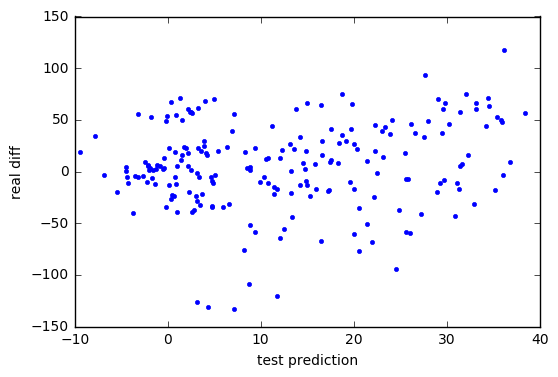

[[ 1.          0.17158969]
 [ 0.17158969  1.        ]]


In [24]:
plt.plot(pred, y_test, ".")
plt.ylabel('real diff')
plt.xlabel('test prediction')
plt.show()
print np.corrcoef(pred,y_test)

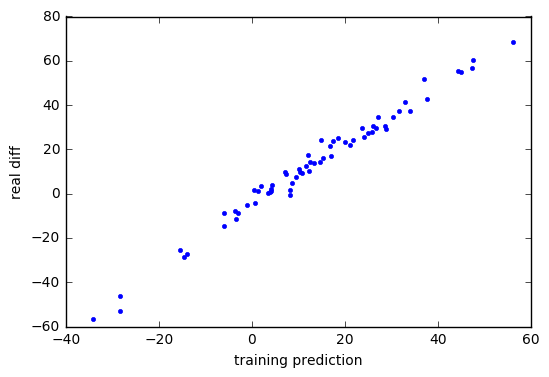

[[ 1.          0.99102253]
 [ 0.99102253  1.        ]]


In [25]:
plt.plot(pred_train, y_train, ".")
plt.ylabel('real diff')
plt.xlabel('training prediction')
plt.show()
print np.corrcoef(pred_train,y_train)